In [1]:
import utils
from utils import get_delivered_df

In [2]:
import pandas as pd

from src.sheets_utils import download_sheet_as_df

In [3]:
import os
import glob

data_folder_path = '/home/saya/chario/upstream_character_tasks/data/batches1.2.3.4.5_full_2024-01-11_09-10-28'
all_files = glob.glob(os.path.join(data_folder_path, "*.csv"))

dfs = {os.path.basename(file): pd.read_csv(file, index_col=None, header=0) for file in all_files}

dfs.keys()

dict_keys(['batches1.2.3.4.5_full-programming_language_tags.csv', 'batches1.2.3.4.5_full-dependency_tags.csv', 'batches1.2.3.4.5_full-expanded_enriched_df.csv', 'batches1.2.3.4.5_full-use_case_tags.csv', 'batches1.2.3.4.5_full-behavioural_tags.csv'])

In [4]:
programming_language_tags_df = dfs['batches1.2.3.4.5_full-programming_language_tags.csv']
dependency_tags_df = dfs['batches1.2.3.4.5_full-dependency_tags.csv']
expanded_enriched_df = dfs['batches1.2.3.4.5_full-expanded_enriched_df.csv']
use_case_tags_df = dfs['batches1.2.3.4.5_full-use_case_tags.csv']
behavioural_tags_df = dfs['batches1.2.3.4.5_full-behavioural_tags.csv']


In [5]:
delivered_df = expanded_enriched_df

In [6]:
expanded_enriched_df.columns

Index(['Unnamed: 0.1', 'task_link', 'metadata__topic', 'number_of_turns',
       'duration_mins', 'batch_id', 'Unnamed: 0', 'use_case__summary',
       'area_of_focus__top_level', 'area_of_focus__sub_level',
       'area_of_focus__detailed_level', 'domain__top_level',
       'domain__sub_level', 'domain__detailed_level'],
      dtype='object')

In [3]:
delivered_df = download_parse_delivered_into_jsonl([], no_work=True)['delivered_df']
delivered_df

TypeError: get_delivered_df() got an unexpected keyword argument 'no_work'

In [ ]:
check expanded_enriched_df domains 2nd

In [31]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(expanded_enriched_df)
fig = px.treemap(
    df, 
    path=['domain__top_level', 'domain__sub_level'], 
    title="Hierarchical Domain Classification",
    height=900,
    width=1600
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
        font=dict(size=22)  # Increase font size
)
fig.show()

In [27]:
import pandas as pd
import plotly.express as px


def limit_categories(df, column, max_categories=9):
    df = df.copy()
    top_categories = df[column].value_counts().head(max_categories).index
    df[column] = df[column].where(df[column].isin(top_categories), 'Others')
    return df

df = pd.DataFrame(expanded_enriched_df)

# Limit the top level categories
df = limit_categories(df, 'domain__top_level')

# Limit the sub level categories within each top level category
top_levels = df['domain__top_level'].unique()
for level in top_levels:
    mask = df['domain__top_level'] == level
    df.loc[mask, 'domain__sub_level'] = limit_categories(df[mask], 'domain__sub_level')['domain__sub_level']

fig = px.treemap(
    df, 
    path=['domain__top_level', 'domain__sub_level'], 
    title="Hierarchical Domain Classification",
    height=900,
    width=1600
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(size=22)  # Increase font size
)
fig.show()

In [32]:
programming_language_tags_df

,Unnamed: 0,task_link,language,percentage
0,0,https://colab.research.google.com/drive/1X4H8L...,python,1.0
1,1,https://colab.research.google.com/drive/1G_d7Z...,python,1.0
2,2,https://colab.research.google.com/drive/1vYEPg...,python,1.0
3,3,https://colab.research.google.com/drive/1_arMF...,python,1.0
4,4,https://colab.research.google.com/drive/10Ahc4...,python,1.0
...,...,...,...,...
3398,3398,https://colab.research.google.com/drive/1lekWL...,python,1.0
3399,3399,https://colab.research.google.com/drive/1QXk9F...,python,1.0
3400,3400,https://colab.research.google.com/drive/1qNCDX...,css,0.5
3401,3401,https://colab.research.google.com/drive/1qNCDX...,sass,0.5


In [6]:
df_languages_agg = programming_language_tags_df.groupby(["language"]).sum().sort_values(by="percentage", ascending=False).reset_index()


In [7]:
from utils import DATA_DIR

In [19]:
import plotly.graph_objects as go

# Create the data for the bar chart
data = [
    go.Bar(
        x=df_languages_agg['percentage'],
        y=df_languages_agg['language'],
        orientation='h',
        marker=dict(
            color='rgba(25, 25, 25, 0.9)',
            line=dict(
                color='rgba(25, 25, 25, 1.0)',
                width=2
            )
        ),
        hovertemplate='Percentage: %{x:.2f}<extra></extra>'
    )
]

data = list(reversed(data))

# Create the layout for the chart
layout = go.Layout(
    title='Programming Language Breakdown (Log Scale)',
    xaxis=dict(
        type='log',
        title='Value (log scale)'
    ),
    yaxis=dict(
        title='Category'
    ),
    margin=dict(
        l=100,
        r=20,
        t=70,
        b=70
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 255, 255)',
    width=800,
    height=800,
    showlegend=False
)

# Create the figure and plot the chart
fig = go.Figure(data=data, layout=layout)
fig.write_image(DATA_DIR + 'bar_chart.png')


fig.show()

In [12]:
df_languages_agg

,language,Unnamed: 0,task_link,percentage
0,python,4810336,https://colab.research.google.com/drive/1X4H8L...,2828.60
1,javascript,166892,https://colab.research.google.com/drive/1_2Z17...,43.45
2,sql,203607,https://colab.research.google.com/drive/1-2s0N...,37.60
3,html,105746,https://colab.research.google.com/drive/1gcZiO...,14.65
4,bash,117895,https://colab.research.google.com/drive/1exOkj...,14.35
...,...,...,...,...
59,ruby,2737,https://colab.research.google.com/drive/1ba3X2...,0.10
60,cuda,2384,https://colab.research.google.com/drive/1FnSpo...,0.10
61,cmd,1814,https://colab.research.google.com/drive/11VeUC...,0.10
62,c#,2736,https://colab.research.google.com/drive/1ba3X2...,0.10


In [17]:
df_languages_agg = programming_language_tags_df.groupby(["language"]).sum().sort_values(by="percentage", ascending=False)
df_languages_agg['percentage'] = df_languages_agg['percentage'] / df_languages_agg['percentage'].sum() * 100
df_languages_agg = df_languages_agg.reset_index()


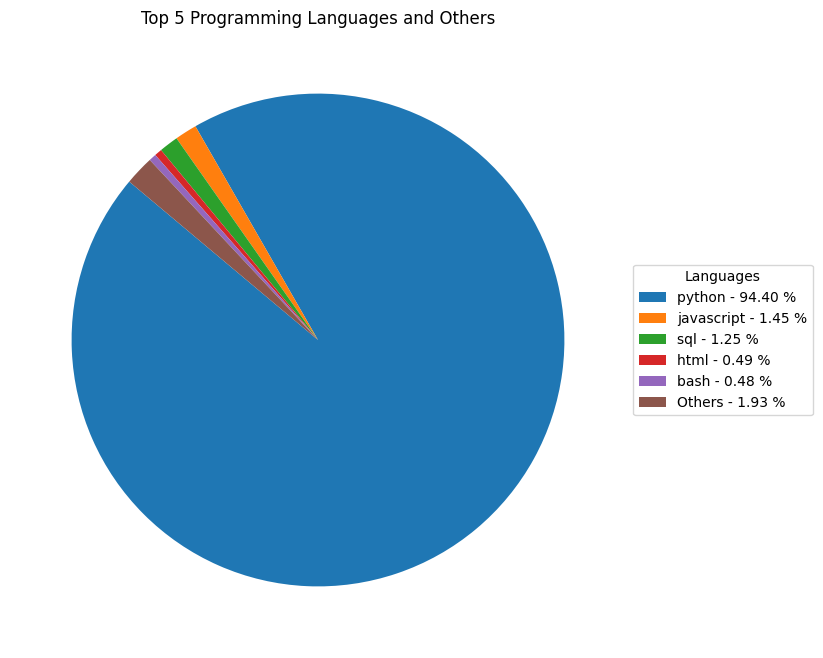

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for pie chart
top_languages = df_languages_agg.nlargest(5, 'percentage')
other_languages_sum = df_languages_agg['percentage'][5:].sum()
pie_data = pd.concat([top_languages, pd.DataFrame([{'language': 'Others', 'percentage': other_languages_sum}])], ignore_index=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    pie_data['percentage'],
    startangle=140
)

# Display a legend with percentage
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_data['language'], pie_data['percentage'])]
ax.legend(wedges, legend_labels,
          title="Languages",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 5 Programming Languages and Others')
plt.savefig(DATA_DIR + 'programming_language_pie_chart.png')
plt.show()




In [9]:
import plotly.graph_objects as go

# Create the data for the pie chart
pie_data = go.Pie(
    labels=df_languages_agg['language'],
    values=df_languages_agg['percentage'],
    hoverinfo='label+percent',
    textinfo='value'
)

# Create the layout for the chart
layout = go.Layout(
    title='Programming Language Breakdown',
    margin=dict(
        l=100,
        r=20,
        t=70,
        b=70
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 255, 255)',
    showlegend=True
)

# Create the figure and plot the chart
fig = go.Figure(data=pie_data, layout=layout)
fig.write_image(DATA_DIR + 'pie_chart.png')


fig.show()

In [42]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.5 MB/s eta 0:00:0000:0100:01


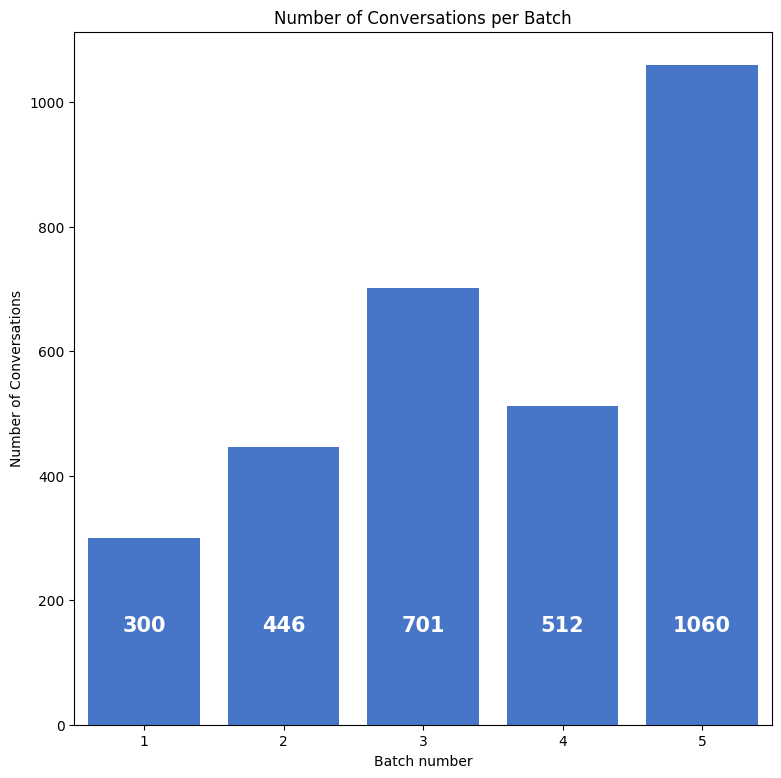

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import turing_palette
# Set the color palette
sns.set_palette(turing_palette)

# 0. Number of Tasks per Batch
task_counts_per_batch = delivered_df['batch_id'].value_counts().sort_index()
plt.figure(figsize=(9, 9))
barplot = sns.barplot(x=task_counts_per_batch.index, y=task_counts_per_batch.values)
plt.title('Number of Conversations per Batch')
plt.xlabel('Batch number')
plt.ylabel('Number of Conversations')

# Add number of tasks above the bars with a larger font and a contrasting color
for index, value in enumerate(task_counts_per_batch.values):
    plt.text(index, 150, str(value), color='white', ha="center", fontweight='bold', fontsize=15)

plt.show()




In [9]:
delivered_df['number_of_turns'].value_counts()

number_of_turns
2     876
3     684
1     596
4     431
5     206
6     106
7      61
8      25
10      9
9       8
11      6
12      4
13      2
20      1
15      1
14      1
18      1
17      1
Name: count, dtype: int64

In [87]:
batch_1_turns_1 = delivered_df[(delivered_df['batch_id'] == 3) & (delivered_df['number_of_turns'] == '3')].shape[0]
print(f"Number of 1 turns in batch 1: {batch_1_turns_1}")


Number of 1 turns in batch 1: 175


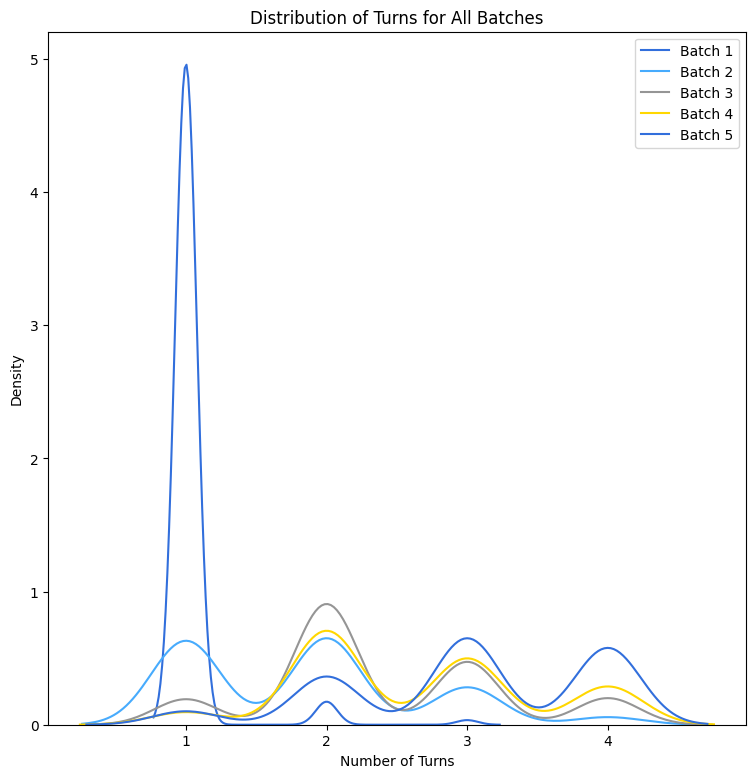

In [11]:
import numpy as np

plt.figure(figsize=(9, 9))
color_palette = ["#326FDC", "#47ABFD", "#959595", "#FFD700"]
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']
for index, batch_id in enumerate(delivered_df['batch_id'].unique()):
    subset = delivered_df[delivered_df['batch_id'] == batch_id].copy()
    # Convert 'number_of_turns' to numeric type before plotting
    subset.loc[:, 'number_of_turns'] = pd.to_numeric(subset['number_of_turns'], errors='coerce')
    subset = subset[subset['number_of_turns'] >= 1]  # Exclude 0 turns
    subset['turns_binned'] = pd.cut(subset['number_of_turns'], bins=bins, labels=labels)
    # Convert 'turns_binned' to numeric type for kdeplot
    subset['turns_binned'] = pd.to_numeric(subset['turns_binned'], errors='coerce')
    sns.kdeplot(subset['turns_binned'], label=f'Batch {batch_id}', color=color_palette[index % len(color_palette)])

plt.title('Distribution of Turns for All Batches')
plt.xlabel('Number of Turns')
plt.ylabel('Density')
plt.legend()
plt.show()



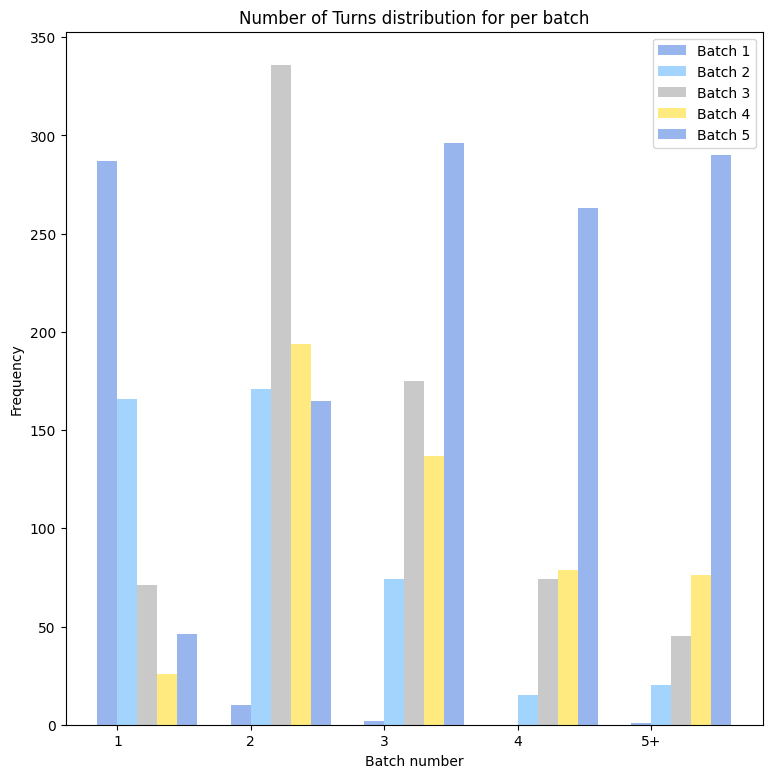

In [12]:
plt.figure(figsize=(9, 9))
color_palette = ["#326FDC", "#47ABFD", "#959595", "#FFD700"]
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']
width = 0.15  # the width of the bars
ind = np.arange(len(labels))  # the x locations for the groups

for index, batch_id in enumerate(delivered_df['batch_id'].unique()):
    subset = delivered_df[delivered_df['batch_id'] == batch_id].copy()
    # Convert 'number_of_turns' to numeric type before plotting
    subset.loc[:, 'number_of_turns'] = pd.to_numeric(subset['number_of_turns'], errors='coerce')
    subset['turns_binned'] = pd.cut(subset['number_of_turns'], bins=bins, labels=labels)
    counts = subset['turns_binned'].value_counts().sort_index()
    plt.bar(ind + width*index, counts, width, color=color_palette[index % len(color_palette)], alpha=0.5, label=f'Batch {batch_id}')

plt.title('Number of Turns distribution for per batch')
plt.xlabel('Batch number')
plt.ylabel('Frequency')
plt.xticks(ind + width / 2, labels)  # set the x-ticks with the labels
plt.legend()
plt.show()


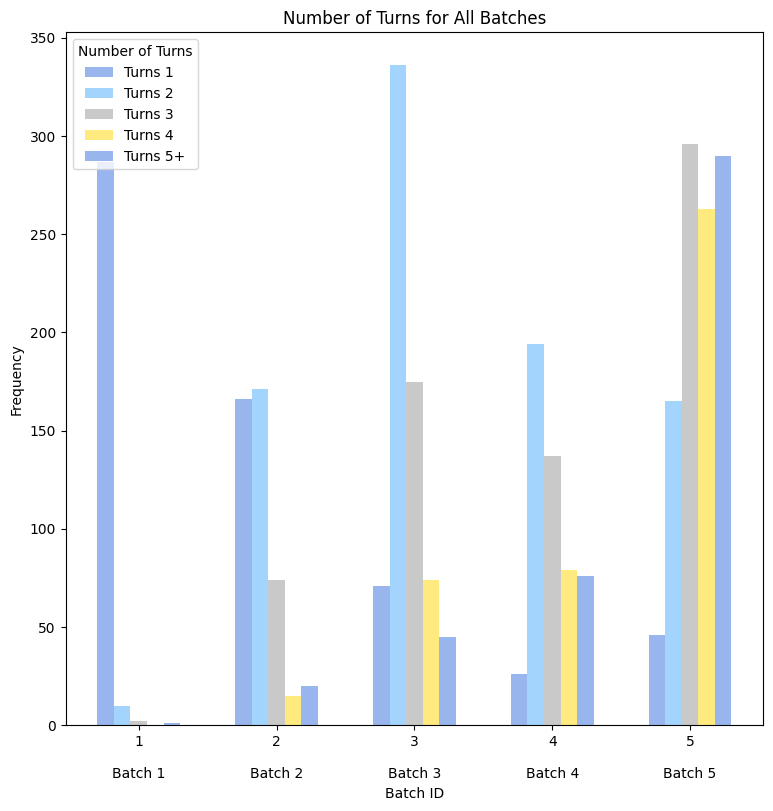

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
color_palette = ["#326FDC", "#47ABFD", "#959595", "#FFD700"]
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']
width = 0.6  # increased the width of the bars to make them fatter

batch_ids = delivered_df['batch_id'].unique()
n_batches = len(batch_ids)
ind = np.arange(n_batches)  # the x locations for the groups

bar_width = width / len(labels)  # adjust bar width within a group based on the new total width

x_ticks_labels = []
x_ticks_positions = []

for label_index, label in enumerate(labels):
    label_counts = []
    for batch_index, batch_id in enumerate(batch_ids):
        subset = delivered_df[delivered_df['batch_id'] == batch_id].copy()
        subset.loc[:, 'number_of_turns'] = pd.to_numeric(subset['number_of_turns'], errors='coerce')
        subset['turns_binned'] = pd.cut(subset['number_of_turns'], bins=bins, labels=labels)
        counts = subset['turns_binned'].value_counts().sort_index()
        label_counts.append(counts.get(label, 0))
        # Add the label for the category below the x-axis
        if label_index == 0:
            x_ticks_labels.append(f'{batch_id}\n\nBatch {batch_id}')
            x_ticks_positions.append(ind[batch_index] + bar_width * (len(labels) - 1) / 2)
    plt.bar(ind + bar_width * label_index, label_counts, bar_width, color=color_palette[label_index % len(color_palette)], alpha=0.5, label=f'Turns {label}')

plt.title('Number of Turns for All Batches')
plt.xlabel('Batch ID')
plt.ylabel('Frequency')
plt.xticks(x_ticks_positions, x_ticks_labels, ha='center')
plt.legend(title='Number of Turns')
plt.show()





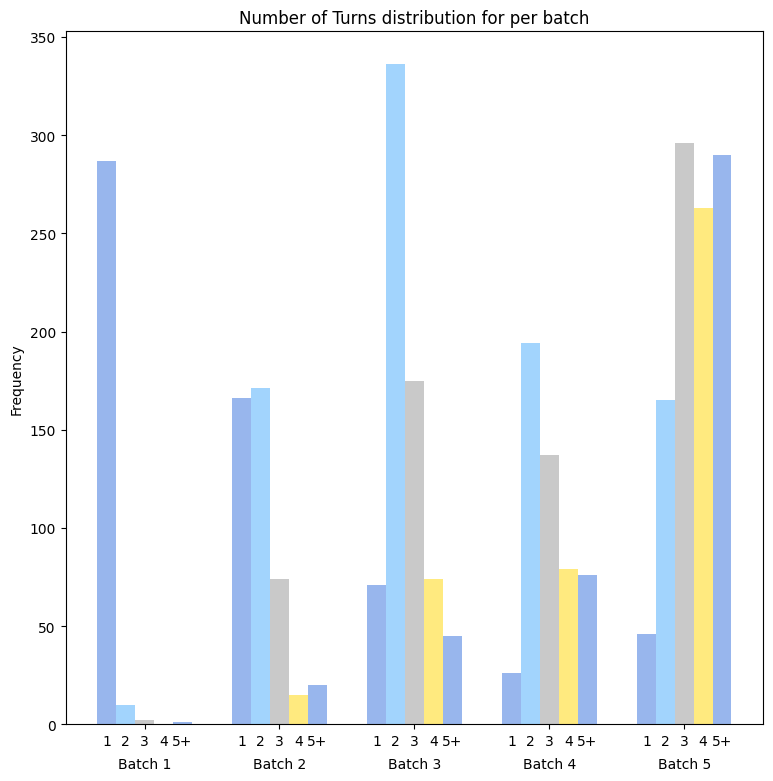

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
color_palette = ["#326FDC", "#47ABFD", "#959595", "#FFD700"]
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']
width = 0.7  # increased the width of the bars to make them fatter

batch_ids = delivered_df['batch_id'].unique()
n_batches = len(batch_ids)
ind = np.arange(n_batches)  # the x locations for the groups

bar_width = width / len(labels)  # adjust bar width within a group based on the new total width

# Create nested x-tick labels
x_ticks_labels = [f'Batch {batch_id}' for batch_id in batch_ids]
x_ticks_positions = ind + bar_width * (len(labels) - 1) / 2

# Plot bars and nested labels
for label_index, label in enumerate(labels):
    label_counts = []
    for batch_index, batch_id in enumerate(batch_ids):
        subset = delivered_df[delivered_df['batch_id'] == batch_id].copy()
        subset.loc[:, 'number_of_turns'] = pd.to_numeric(subset['number_of_turns'], errors='coerce')
        subset['turns_binned'] = pd.cut(subset['number_of_turns'], bins=bins, labels=labels)
        counts = subset['turns_binned'].value_counts().sort_index()
        label_counts.append(counts.get(label, 0))
        
        # Label each bar with the turn label
        bar_position = ind[batch_index] + bar_width * label_index
        plt.text(bar_position, -5, label, ha='center', va='top', color='black', fontsize=10)
        
    plt.bar(ind + bar_width * label_index, label_counts, bar_width, color=color_palette[label_index % len(color_palette)], alpha=0.5, label=f'Turns {label}')

# Set main x-tick labels (Batch IDs)
plt.xticks(x_ticks_positions, x_ticks_labels, ha='center')

# Adjust the main x-tick labels to make space for the nested labels
plt.tick_params(axis='x', which='major', pad=20)

plt.title('Number of Turns distribution for per batch')

plt.ylabel('Frequency')
#plt.legend(title='Number of Turns')
plt.show()

batch_id
1     319
2     915
3    1833
4    1572
Name: number_of_turns, dtype: int64

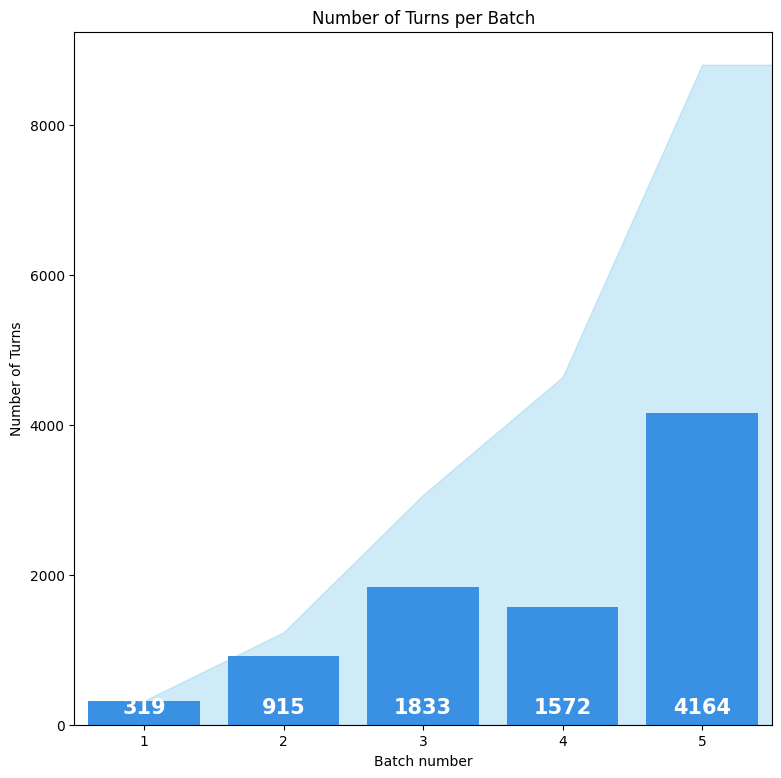

In [15]:
import numpy as np

sns.set_palette([
    "#326FDC",  # Celtic Blue
    "#47ABFD",  # Argentinian Blue
    "#959595",  # Battleship gray
    "#FFFFFF",  # White
    "#EFEFEF",  # Anti-flash white
    "#000000",  # Black
])
# 0. Number of Tasks per Batch
delivered_df['number_of_turns'] = pd.to_numeric(delivered_df['number_of_turns'], errors='coerce')
turns_counts_per_batch = delivered_df.groupby('batch_id')['number_of_turns'].sum()
turns_counts_per_batch
plt.figure(figsize=(9, 9))
# Calculate the cumulative counts starting from batch 1
cumulative_counts = turns_counts_per_batch.cumsum()


# Plot the cumulative counts as a colored area under the curve
# Start from batch 1 and end at the last batch
# Extend the cumulative counts by copying the last value
barplot = sns.barplot(x=turns_counts_per_batch.index, y=turns_counts_per_batch.values)
lim = plt.xlim()
extended_cumulative_counts = cumulative_counts.copy()
extended_cumulative_counts.loc[cumulative_counts.index[-1] + 1] = cumulative_counts.iloc[-1]
plt.fill_between(extended_cumulative_counts.index-1, 0, extended_cumulative_counts, color="skyblue", alpha=0.4)

barplot = sns.barplot(x=turns_counts_per_batch.index, y=turns_counts_per_batch.values, color='dodgerblue')


# Set the x limit to the original range
plt.xlim(*lim)
plt.title('Number of Turns per Batch')
plt.xlabel('Batch number')
plt.ylabel('Number of Turns')

# Add number of tasks above the bars with a larger font and a contrasting color
for index, value in enumerate(turns_counts_per_batch.values):
    plt.text(index, 150, str(value), color='white', ha="center", fontweight='bold', fontsize=15)

plt.show()

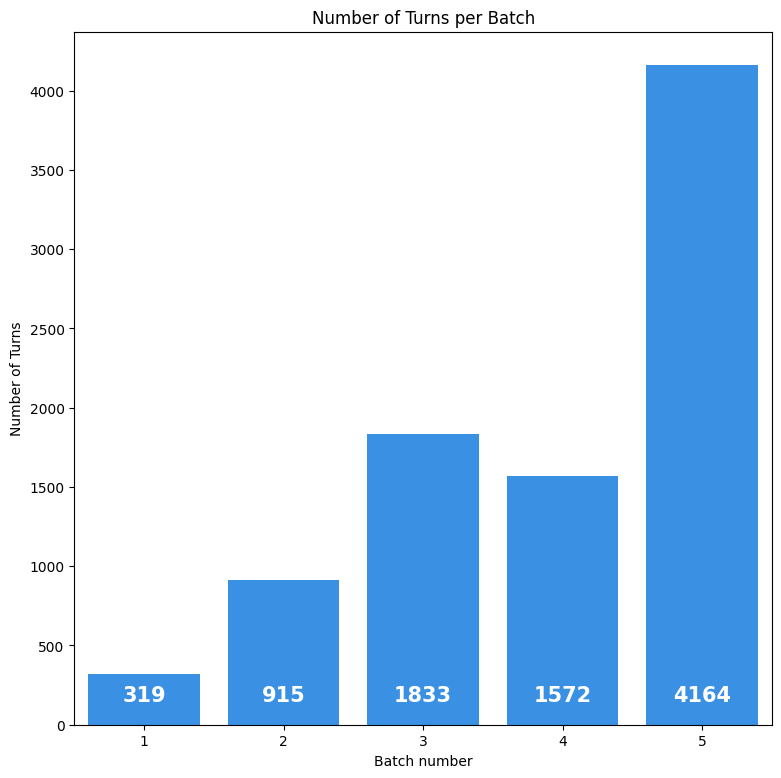

In [16]:
import numpy as np

sns.set_palette([
    "#326FDC",  # Celtic Blue
    "#47ABFD",  # Argentinian Blue
    "#959595",  # Battleship gray
    "#FFFFFF",  # White
    "#EFEFEF",  # Anti-flash white
    "#000000",  # Black
])
# 0. Number of Tasks per Batch
delivered_df['number_of_turns'] = pd.to_numeric(delivered_df['number_of_turns'], errors='coerce')
turns_counts_per_batch = delivered_df.groupby('batch_id')['number_of_turns'].sum()
turns_counts_per_batch
plt.figure(figsize=(9, 9))

barplot = sns.barplot(x=turns_counts_per_batch.index, y=turns_counts_per_batch.values, color='dodgerblue')

plt.title('Number of Turns per Batch')
plt.xlabel('Batch number')
plt.ylabel('Number of Turns')

# Add number of tasks above the bars with a larger font and a contrasting color
for index, value in enumerate(turns_counts_per_batch.values):
    plt.text(index, 150, str(value), color='white', ha="center", fontweight='bold', fontsize=15)

plt.show()

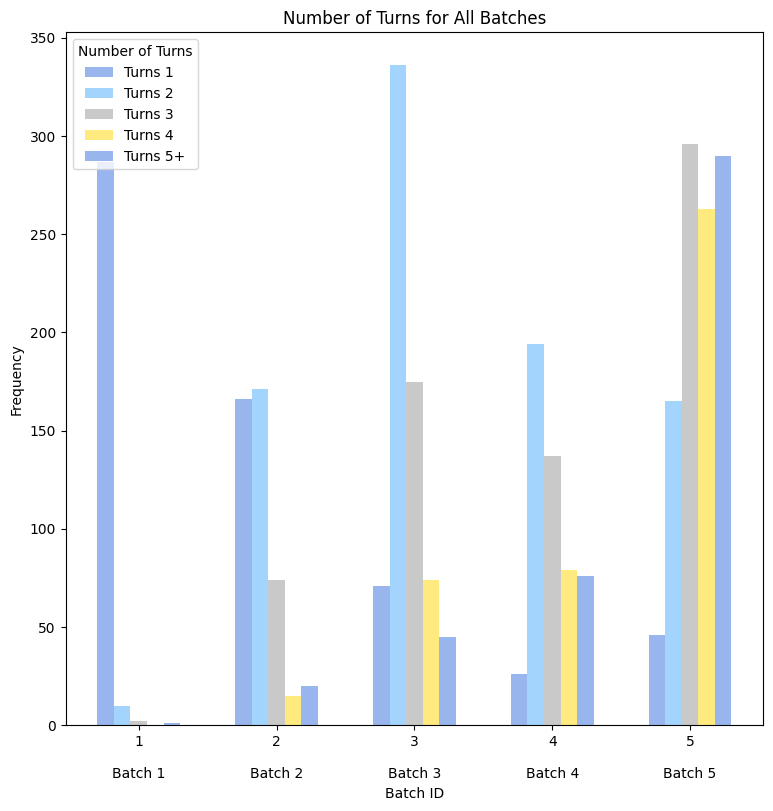

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
color_palette = ["#326FDC", "#47ABFD", "#959595", "#FFD700"]
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']
width = 0.6  # increased the width of the bars to make them fatter

batch_ids = delivered_df['batch_id'].unique()
n_batches = len(batch_ids)
ind = np.arange(n_batches)  # the x locations for the groups

bar_width = width / len(labels)  # adjust bar width within a group based on the new total width

x_ticks_labels = []
x_ticks_positions = []

for label_index, label in enumerate(labels):
    label_counts = []
    for batch_index, batch_id in enumerate(batch_ids):
        subset = delivered_df[delivered_df['batch_id'] == batch_id].copy()
        subset.loc[:, 'number_of_turns'] = pd.to_numeric(subset['number_of_turns'], errors='coerce')
        subset['turns_binned'] = pd.cut(subset['number_of_turns'], bins=bins, labels=labels)
        counts = subset['turns_binned'].value_counts().sort_index()
        label_counts.append(counts.get(label, 0))
        # Add the label for the category below the x-axis
        if label_index == 0:
            x_ticks_labels.append(f'{batch_id}\n\nBatch {batch_id}')
            x_ticks_positions.append(ind[batch_index] + bar_width * (len(labels) - 1) / 2)
    plt.bar(ind + bar_width * label_index, label_counts, bar_width, color=color_palette[label_index % len(color_palette)], alpha=0.5, label=f'Turns {label}')

plt.title('Number of Turns for All Batches')
plt.xlabel('Batch ID')
plt.ylabel('Frequency')
plt.xticks(x_ticks_positions, x_ticks_labels, ha='center')
plt.legend(title='Number of Turns')
plt.show()





In [45]:
task_counts_per_batch.cumsum()

batch_id
1     300
2     746
3    1447
4    1959
Name: count, dtype: int64

In [51]:
cumulative_counts

batch_id
1     300
2     746
3    1447
4    1959
Name: count, dtype: int64

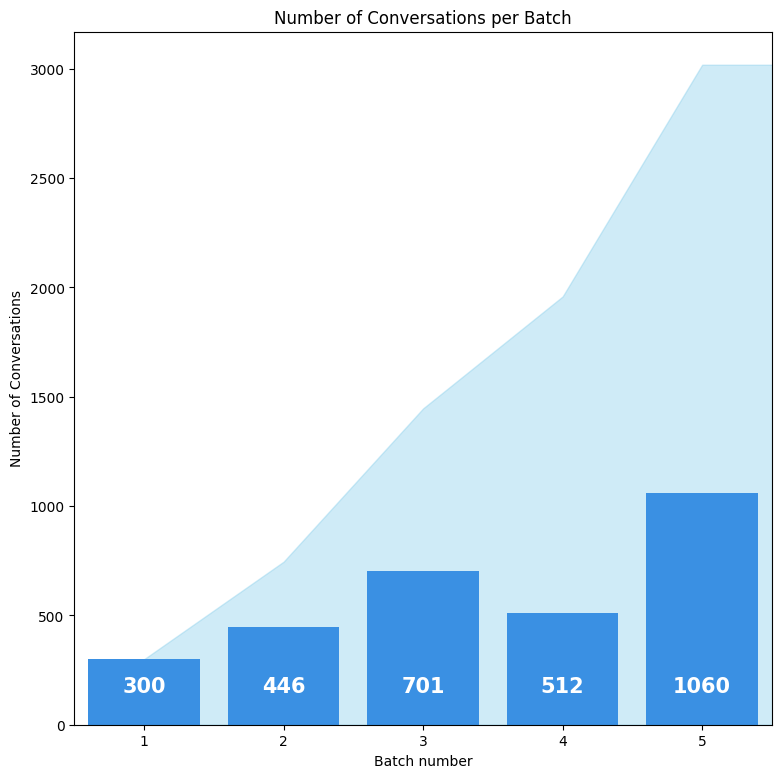

In [18]:
import numpy as np

sns.set_palette([
    "#326FDC",  # Celtic Blue
    "#47ABFD",  # Argentinian Blue
    "#959595",  # Battleship gray
    "#FFFFFF",  # White
    "#EFEFEF",  # Anti-flash white
    "#000000",  # Black
])
# 0. Number of Tasks per Batch
task_counts_per_batch = delivered_df['batch_id'].value_counts().sort_index()
plt.figure(figsize=(9, 9))
# Calculate the cumulative counts starting from batch 1
cumulative_counts = task_counts_per_batch.cumsum()


# Plot the cumulative counts as a colored area under the curve
# Start from batch 1 and end at the last batch
# Extend the cumulative counts by copying the last value
barplot = sns.barplot(x=task_counts_per_batch.index, y=task_counts_per_batch.values)
lim = plt.xlim()
extended_cumulative_counts = cumulative_counts.copy()
extended_cumulative_counts.loc[cumulative_counts.index[-1] + 1] = cumulative_counts.iloc[-1]
plt.fill_between(extended_cumulative_counts.index-1, 0, extended_cumulative_counts, color="skyblue", alpha=0.4)

barplot = sns.barplot(x=task_counts_per_batch.index, y=task_counts_per_batch.values, color='dodgerblue')


# Set the x limit to the original range
plt.xlim(*lim)
plt.title('Number of Conversations per Batch')
plt.xlabel('Batch number')
plt.ylabel('Number of Conversations')

# Add number of tasks above the bars with a larger font and a contrasting color
for index, value in enumerate(task_counts_per_batch.values):
    plt.text(index, 150, str(value), color='white', ha="center", fontweight='bold', fontsize=15)

plt.show()

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

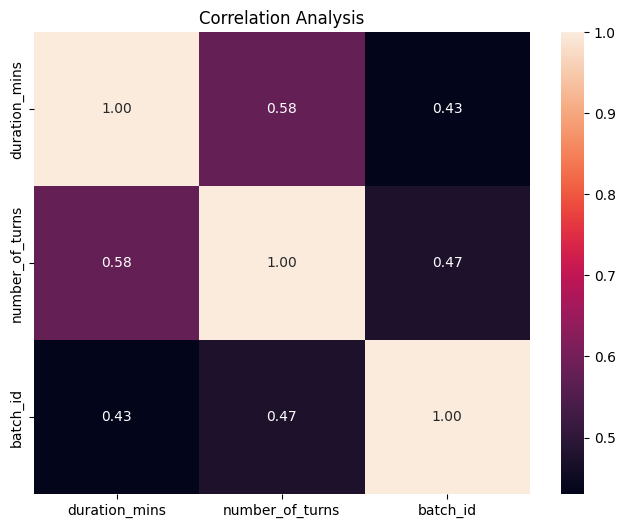

In [9]:
# 5. Correlation Analysis
correlation_matrix = delivered_df[['duration_mins', 'number_of_turns', 'batch_id']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Error parsing notebook: Failed to predict missing roles.
Download progress: 100%.
Download

In [4]:
delivered_b4 = delivered_df[delivered_df['batch_id'] == 4].copy()

In [9]:
for conversation in parsed_conversations:
    if conversation is not None:
        print(conversation["metadata"])

{'topic': 'algorithms > by_data_structure > advanced_data_structures', 'type': 'modification', 'target_turns': '1'}
{'topic': 'unit_testing_methodology > testing_database_interaction', 'type': 'query', 'target_turns': '1'}
{'topic': 'unit_testing_methodology > test_ai_and_ml_models', 'type': 'modification', 'target_turns': '2'}
{'topic': 'unit_testing_methodology > test_ai_and_ml_models', 'type': 'modification', 'target_turns': '3'}
{'topic': 'web_development > web_development_trends', 'type': 'query', 'target_turns': '2'}
{'topic': 'web_development > web_development_best_practices', 'type': 'query', 'target_turns': '2'}
{'topic': 'web_development > web_design', 'type': 'query', 'target_turns': '3'}
{'topic': 'ml_principles > model_accuracy_assessment', 'type': 'modification', 'target_turns': '2'}
{'topic': 'data_analysis > time_series_analysis', 'type': 'query', 'target_turns': '2'}
{'topic': 'database > transaction_management', 'type': 'query', 'target_turns': '2'}
{'topic': 'unit_te

In [25]:
import json
from tqdm import tqdm
import concurrent.futures

def process_file(file):
    with open(f"{DATA_DIR}jsonl_conversations/Batch 4/{file}") as f:
        conversation = json.load(f)
    output = exec_summary(conversation, SummaryTheme(theme="User Use Case, how user uses the Assistant"))
    record = {
        "id": conversation["id"],
        "colab_link": f"https://colab.research.google.com/drive/{conversation['id']}"
    }
    record.update(output)
    return record




file_list = os.listdir(DATA_DIR + "jsonl_conversations/Batch 4/")[:50]
results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(process_file, file) for file in file_list]
    progress_bar = tqdm(total=len(futures))
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())
        progress_bar.update(1)
    progress_bar.close()


  2%|▏         | 1/50 [00:04<03:27,  4.23s/it]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to learn about dictionary comprehensions in Python, specifically requesting an example to create a dictionary with keys 'a' to 'e' and their corresponding ordinal values. The Assistant provides a code example and explains the concept and structure of dictionary comprehensions. The user's interaction demonstrates a use case of seeking programming education and code assistance from the Assistant."}


  4%|▍         | 2/50 [00:05<01:49,  2.29s/it]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to troubleshoot a technical issue with a web UI for text generation. They engage in a back-and-forth conversation to diagnose a 'KeyError' exception that occurred after updating the software. The Assistant helps by analyzing the error, requesting version information, and comparing software releases to identify the cause of the problem. The user follows the Assistant's guidance to provide necessary details and seems to rely on the Assistant's expertise to resolve the issue."}


  6%|▌         | 3/50 [00:06<01:22,  1.75s/it]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to improve their Python code by implementing context managers for resource management. The user's goal is to ensure that a temporary directory is automatically cleaned up after use and to optimize code that acquires and releases a lock. The Assistant provides revised code snippets that use the 'with' statement to handle the creation and cleanup of a temporary directory, as well as to manage the acquisition and release of a threading lock, demonstrating the user's use case of leveraging the Assistant for code optimization and best practices in resource management."}


  8%|▊         | 4/50 [00:06<00:59,  1.30s/it]

Function call: SummaryResult with args: {"summary":"The user is exploring how to make Python scripts executable within a virtual environment and the implications of using a shebang line versus explicitly calling the Python interpreter. They are interested in understanding the process of creating an executable script, the differences between execution methods, handling errors from incorrect shebang paths, and the scenarios where one method may be more beneficial than the other. The user's use case involves ensuring ease of execution, maintaining environment-specific settings, and achieving cross-platform portability for Python scripts."}


 10%|█         | 5/50 [00:07<00:43,  1.03it/s]

Function call: SummaryResult with args: {"summary":"The user is utilizing the Assistant to troubleshoot a technical issue with a custom pretrained model for a text-to-speech service. They have followed the documentation and attempted to solve the problem independently before reaching out. The user provides detailed information about their system setup, the specific commands they executed, and the error messages received. The Assistant is used as a technical advisor, providing a structured solution to address the error by modifying and cleaning the checkpoint files in the user's machine learning pipeline."}
Function call: SummaryResult with args: {"summary":"The user is exploring how to use the Assistant to simulate the effect of a dropout layer during the testing phase of a neural network to assess the model's robustness. They inquire about the consistency of results when dropout is enabled during testing and whether this approach is common in the industry. The Assistant provides detai

 14%|█▍        | 7/50 [00:07<00:24,  1.73it/s]

Function call: SummaryResult with args: {"summary":"The user is seeking guidance on best practices for naming and structuring test functions in Python. They are using the Assistant to understand how to create test names that are concise, descriptive, and indicative of the test's purpose. Additionally, the user is interested in learning about the content and structure within a test function, aiming to write tests that are readable, isolated, and follow the Arrange-Act-Assert pattern. The Assistant provides detailed advice and examples to help the user implement these best practices in their testing workflow."}


 16%|█▌        | 8/50 [00:07<00:20,  2.06it/s]

Function call: SummaryResult with args: {"summary":"The user is engaging with the Assistant to improve their graph traversal algorithms. Initially, the user seeks to enhance a depth-first search (DFS) function to track the visitation order of nodes. The Assistant provides a modified DFS code that includes a traversal order list. Subsequently, the user inquires about adapting the algorithm for breadth-first search (BFS) while maintaining the visitation order. The Assistant responds with a BFS implementation using a queue. Finally, the user requests a comparison between DFS and BFS, which the Assistant provides, highlighting differences in space complexity and node tracking."}


 18%|█▊        | 9/50 [00:09<00:29,  1.38it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to learn about writing test cases using Test Driven Development (TDD) principles. They request guidance on creating a test case for a 'find_max' function, which involves writing a failing test first and then coding the function to pass the test. The Assistant provides step-by-step instructions, including code examples using Python's `unittest` module. The user further inquires about incorporating `setup` and `teardown` methods within the test framework, to which the Assistant responds with additional code examples demonstrating their implementation."}


 20%|██        | 10/50 [00:11<00:44,  1.11s/it]

Function call: SummaryResult with args: {"summary":"The user in the conversation is seeking to understand and implement a rotating file handler for their Python application's logging system. They are interested in configuring the logging system to manage log files efficiently, prevent excessive disk space usage, and ensure proper log maintenance. The user is engaging with the Assistant to learn about the benefits of rotating file handlers over regular file handlers, and to receive guidance on setting up and maintaining such a system. The user's use case involves practical application of logging best practices, with a focus on log file rotation, size control, and historical log preservation."}


 22%|██▏       | 11/50 [00:11<00:35,  1.09it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to understand the process of converting a .pyx file to a C extension using Cython. They seek step-by-step guidance and request a practical example to illustrate the conversion process. The Assistant provides detailed instructions, including the installation of Cython, writing a .pyx file, creating a setup.py file, building the code, and using the compiled module. The user's interaction demonstrates a use case of leveraging the Assistant for learning and implementing programming tasks, specifically in the context of Cython and C extensions."}


 24%|██▍       | 12/50 [00:11<00:27,  1.40it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to receive programming assistance, specifically requesting a Python code snippet to check if an array is monotonic. The user then asks for an enhancement to the code to indicate the type of monotonicity (increase or decrease). Lastly, the user inquires about the time and space complexities of the provided code, demonstrating a use case where the Assistant is utilized as a coding resource and educational tool for understanding algorithmic efficiency."}


 28%|██▊       | 14/50 [00:12<00:17,  2.10it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to develop and refine Python functions for managing anagrams within a hash table. Initially, the user requests a function to group anagrams from a list of words. The Assistant provides a solution and then adapts it to use tuples as keys upon the user's request. The user further asks for an inverse function to ungroup anagrams and a function to add more words to an existing hash table of anagrams. The Assistant responds with appropriate code snippets for each task, demonstrating the user's iterative approach to building and enhancing a specific data structure manipulation toolset with the Assistant's guidance."}
Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to improve their Python code for counting nodes in a linked list. Initially, the user presents an incomplete function and requests assistance to complete it. The Assistant provides a solution that traverses th

 30%|███       | 15/50 [00:13<00:20,  1.70it/s]

Function call: SummaryResult with args: {"summary":"The user is engaging with the Assistant to learn how to use the `assertRaises` method in Python's `unittest` framework to test for exceptions in dictionary operations. Specifically, the user is interested in verifying that a `KeyError` is raised when attempting to access a non-existent key in a dictionary. The Assistant provides a code example demonstrating the use of `assertRaises` within a `TestCase` class to catch a `KeyError`. The user also inquires about other potential errors with dictionaries, leading the Assistant to provide another example to test for a `TypeError` when using an unhashable object as a key."}


 32%|███▏      | 16/50 [00:14<00:29,  1.17it/s]

Function call: SummaryResult with args: {"summary":"In the conversation, the user utilizes the Assistant to solve a specific problem related to database normalization in Python. The user's use case involves merging two tables while maintaining the Fifth Normal Form (5NF) and adding new entries to the 'database' without violating normalization principles. The Assistant provides code examples and explanations to guide the user through the process of joining tables and adding new records in a way that respects 5NF. This demonstrates the user's reliance on the Assistant for technical guidance and programming support in complex database operations."}
Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to learn how to implement a specific programming task, in this case, appending a new node to the end of a linked list in Python. The user's interaction with the Assistant is educational, seeking step-by-step guidance to understand and execute a coding problem. T

 36%|███▌      | 18/50 [00:15<00:19,  1.67it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to learn how to perform technical tasks related to database management. Specifically, the user inquires about creating backups of an SQLite database using Python and scheduling automatic backups with cron. The Assistant provides detailed instructions and code examples for backing up the database using the sqlite3 module and the shutil library in Python. Additionally, the Assistant guides the user on setting up a cron job to automate the backup process on Unix-based systems, demonstrating the user's intent to implement regular database maintenance through automation."}


 38%|███▊      | 19/50 [00:16<00:21,  1.41it/s]

Function call: SummaryResult with args: {"summary":"The user is engaging with the Assistant to understand and implement a modified version of the insertion sort algorithm that sorts only a specific portion of a list. They request assistance in modifying the existing algorithm to include 'start' and 'end' parameters to target the sorting process. The user also inquires about the best sorting algorithm for small datasets or partial array sorting, to which the Assistant recommends insertion sort for its simplicity, low overhead, and effectiveness in small segments. Additionally, the user seeks a comparison of time complexity between insertion sort and timsort for very small datasets, and the Assistant explains that while insertion sort is slightly faster for very small datasets due to minimal overhead, timsort is more efficient for larger datasets."}


 40%|████      | 20/50 [00:17<00:25,  1.17it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to refine a Python function for calculating the minimum number of refueling stops for a car journey. Initially, the user presents a code snippet that doesn't account for the initial fuel in the tank. The Assistant provides a solution using a priority queue and explains the greedy algorithm approach. The user then requests further enhancements to track the positions of the refueling stops and to handle multiple stations at the same position. The Assistant iteratively improves the function, adding features to return the positions of stops and to choose the station with the most fuel when multiple options are available at the same location."}


 42%|████▏     | 21/50 [00:18<00:27,  1.04it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to understand and implement encapsulation in Python using getters and setters. They explore the use of the `@property` decorator to create private attributes and control access to a class's data. The conversation includes examples of encapsulation in a single class, with inheritance in subclasses, and with multiple properties. The user also inquires about efficient ways to handle similar properties, leading to a discussion on descriptors as a solution for reducing redundancy in getters and setters."}


 44%|████▍     | 22/50 [00:19<00:21,  1.32it/s]

Function call: SummaryResult with args: {"summary":"In the conversation, the user is seeking assistance to modify a Python function that calculates the slope of a line. The user's use case involves adding exception handling to the function to account for vertical lines, which would cause a division by zero error. The Assistant provides a solution by implementing a try-except block to catch the ZeroDivisionError, and further explains the importance of catching specific exceptions. The user inquires about alternative methods, and the Assistant also demonstrates a conditional approach to handle the vertical line case without using exceptions. Throughout the interaction, the user is actively engaged in understanding and improving the function's robustness to handle edge cases in their code."}


 46%|████▌     | 23/50 [00:19<00:16,  1.62it/s]

Function call: SummaryResult with args: {"summary":"The user in the conversation is seeking assistance on how to use mocking techniques to test a data processing function in Python that involves database calls. They are exploring different ways to implement mocks using the `unittest.mock` module, including the use of `MagicMock` objects and the `@patch` decorator. The user's goal is to ensure that their unit tests can simulate both successful database interactions and error scenarios without having to rely on an actual database, thereby isolating the function's logic for more reliable testing."}


 48%|████▊     | 24/50 [00:21<00:24,  1.08it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to transform a coding task involving a list of string representations of integers into a functional code snippet. Initially, the user requests assistance to convert strings to integers and calculate their product. The Assistant provides a solution using Python's `map()` function and `reduce()` from the `functools` module. The user then asks for alternative methods without `functools`, prompting the Assistant to offer a simpler loop-based approach. Throughout the interaction, the user utilizes the Assistant as a coding resource, seeking to optimize and simplify their code for a specific computational task."}
Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to learn how to implement token-based authentication in a Flask application. They follow a step-by-step guide provided by the Assistant, including installing necessary packages, setting up the Flask app, and p

 54%|█████▍    | 27/50 [00:22<00:14,  1.64it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to improve the performance of a recursive factorial function by implementing memoization. The user provides the original function and seeks guidance on refactoring it to store computed results and avoid redundant calculations. The Assistant explains the concept of memoization and demonstrates how to apply it by passing a dictionary to store results. The user inquires about the inner workings of memoization and the implications of defining the memo dictionary within the function scope. The Assistant clarifies the importance of maintaining the memoization state across recursive calls and provides an alternative implementation that encapsulates the memo dictionary within the function."}


 56%|█████▌    | 28/50 [00:23<00:15,  1.39it/s]

Function call: SummaryResult with args: {"summary":"In the conversation, the user utilizes the Assistant to gather ideas and examples for writing an article on error handling in Python. The user seeks suggestions on structuring the content and explaining concepts such as exceptions, try-except blocks, and handling multiple exceptions. The Assistant provides detailed examples and explanations, helping the user understand how to catch different types of errors, use the else and finally clauses, emphasize the importance of logging and tracebacks, and introduce custom exceptions. The user engages with the Assistant to refine the article's outline and gain confidence in the topic, demonstrating a collaborative use case where the Assistant acts as a knowledgeable guide in the content creation process."}


 58%|█████▊    | 29/50 [00:24<00:18,  1.13it/s]

Function call: SummaryResult with args: {"summary":"The user is seeking assistance with the Python `gc` module, specifically how to use `gc.set_debug` to enable and control garbage collection debugging within a function. The user is interested in understanding the different flags available for debugging, how to combine them, and how to enable and disable debugging within the function's scope. Additionally, the user inquires about viewing and programmatically analyzing the debug output, leading to explanations about redirecting `stderr` to a file or capturing it in Python, and the possibility of using external tools for analysis."}


 60%|██████    | 30/50 [00:25<00:16,  1.24it/s]

Function call: SummaryResult with args: {"summary":"The user interacts with the Assistant to refine their Python script by seeking guidance on importing specific functions from modules, in this case, the 'join' function from 'os.path'. The user's goal is to enhance their script's efficiency by importing only the necessary components. The Assistant provides the correct syntax for importing a single function and explains its purpose, demonstrating the user's use case of leveraging the Assistant's expertise to improve their coding practices."}


 62%|██████▏   | 31/50 [00:26<00:17,  1.10it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to enhance a Python decorator's functionality to handle keyword-only arguments. The user presents their existing code and seeks assistance to modify the decorator to manage these arguments effectively. The Assistant provides code examples and explanations to address the user's request, demonstrating how to extract keyword-only arguments and handle multiple such arguments within the decorator. The user also inquires about the handling of default values for keyword-only arguments, to which the Assistant clarifies that default values are used if no argument is provided when calling the decorated function."}


 66%|██████▌   | 33/50 [00:27<00:10,  1.62it/s]

Function call: SummaryResult with args: {"summary":"The user in the conversation is seeking assistance with FastAPI, specifically in creating middleware to handle unauthorized requests. They inquire about the syntax for middleware creation and express an intent to use it for checking authorization, requesting sample code to raise a 401 error for unauthorized access. The Assistant provides detailed instructions and code examples for setting up middleware in FastAPI, including an example of an authorization middleware that checks for a custom header and raises a 401 Unauthorized error if the request is not authorized."}
Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to improve their Python coding practices, specifically seeking advice on string concatenation. They initially ask how to make their code more Pythonic by using the `join` method instead of a loop with repeated concatenation. The user further inquires about adding separators between strings

 68%|██████▊   | 34/50 [00:28<00:13,  1.16it/s]

Function call: SummaryResult with args: {"summary":"In the conversation, the user is seeking assistance with modifying their Python code to read a CSV file while skipping the header row. The user initially receives a suggestion to use the `next()` function but expresses a preference for a different method. The Assistant then proposes using the `enumerate` function to skip the header, but the user clarifies that the header is in the second row, not the first. The Assistant offers a revised solution using `enumerate` to skip the first two rows, which aligns with the user's preference and resolves the issue."}
Function call: SummaryResult with args: {"summary":"In the conversation, the user utilizes the Assistant to enhance a Python function by adding input validation. The user's initial request is to validate that the parameter 'k' is not greater than 'n' in a function that calculates partition counts. The Assistant provides the necessary code modification. The user then asks to include 

 72%|███████▏  | 36/50 [00:29<00:09,  1.49it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to explore the application of test-driven development (TDD) for a login system. They seek guidance on the TDD process, including the sequence of writing tests before coding, and inquire about the benefits of this methodology. The Assistant provides a detailed explanation, outlining steps such as understanding requirements, writing initial tests, implementing minimal code, and continuous refinement. The user's use case demonstrates a practical approach to learning and applying TDD principles, with the Assistant serving as an educational resource to enhance the user's software development practices."}


 74%|███████▍  | 37/50 [00:30<00:10,  1.26it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to debug a Python programming error. They present an error message and code snippet, seeking help to resolve an AttributeError. The Assistant identifies the issue as a misuse of a string method and provides the correct usage, demonstrating the user's reliance on the Assistant for coding support and guidance."}


 76%|███████▌  | 38/50 [00:30<00:07,  1.52it/s]

Function call: SummaryResult with args: {"summary":"The user in the conversation is seeking assistance with data analysis tasks using the pandas library in Python. Specifically, the user is interested in learning how to group a DataFrame by one column and calculate the standard deviation of another column. The user demonstrates a use case of applying statistical methods to organize and analyze data, indicating a need for understanding data manipulation and aggregation techniques. The Assistant provides step-by-step guidance, including code examples, to help the user achieve their goal, which reflects the user's engagement in a learning process to enhance their data analysis skills."}
Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to learn about specific Python implementations of a union-find data structure, focusing on the 'union' operation and path compression within the 'find' method. The user requests code examples to understand how these ope

 80%|████████  | 40/50 [00:32<00:06,  1.54it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to refine a Python function for calculating the least common multiple (LCM) of two numbers. Initially, the user presents a partial function and seeks assistance to complete it. The Assistant provides guidance on incorporating the greatest common divisor (GCD) into the function and offers a complete solution with example usage. Additionally, the user inquires about the availability of these functions in the Python standard library, to which the Assistant responds affirmatively, demonstrating the use of `math.gcd()` and `math.lcm()` with examples."}


 82%|████████▏ | 41/50 [00:33<00:06,  1.30it/s]

Function call: SummaryResult with args: {"summary":"The user is engaging with the Assistant to develop a Python C extension module. They request assistance in refactoring existing code to create a new module method called 'multiply' that can take two arguments and return their product. The user is focused on ensuring that the method works correctly, first for integers and then for floating-point numbers, including negative values. The Assistant provides detailed code examples and explanations to accommodate the user's requirements, demonstrating an iterative development process where the user's feedback leads to further refinement of the code."}


 84%|████████▍ | 42/50 [00:33<00:05,  1.59it/s]

Function call: SummaryResult with args: {"summary":"The user interacts with the Assistant to learn how to programmatically delete a file in Python, ensuring the file exists before attempting deletion. They explore different methods, including using the `os` module and the `pathlib` module, and seek compatibility with both Python 2 and 3. The Assistant provides code snippets and guidance on using these modules, including a Python 2 compatible solution using the `pathlib2` backport. The user's use case reflects a need for cross-version Python coding practices and a preference for object-oriented file system path handling."}


 86%|████████▌ | 43/50 [00:34<00:04,  1.71it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to improve their coding skills, specifically seeking assistance in refactoring code to create a dictionary using Python comprehension techniques. The user presents their initial code and asks for a more efficient one-liner solution. The Assistant responds by providing alternative methods, including dictionary comprehension and the use of the `zip` and `map` functions combined with the `dict` constructor. The user shows a keen interest in understanding the underlying mechanics of these functions, prompting the Assistant to offer detailed explanations. This interaction showcases the user's use case of leveraging the Assistant as a learning tool to enhance their programming proficiency and optimize their code."}


 88%|████████▊ | 44/50 [00:34<00:03,  1.78it/s]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to explore algorithms for calculating the greatest common divisor (GCD) of two numbers. Initially, the user requests a demonstration of a recursive algorithm and inquires about its time and space complexity. The Assistant provides a detailed explanation, example, and Python code for the recursive approach, as well as the complexities involved. Later, the user shows interest in an iterative version of the algorithm, prompting the Assistant to supply the corresponding Python code and validation for that approach as well."}


 90%|█████████ | 45/50 [00:35<00:03,  1.48it/s]

Function call: SummaryResult with args: {"summary":"The user is seeking assistance with testing an asynchronous function designed to handle multiple requests concurrently using pytest. They are specifically interested in ensuring that the function can process a batch of requests properly. The user initially presents a simple version of the function and later requests a more realistic implementation that simulates network operations. The Assistant provides guidance on writing a test case for the simple version and then offers a more complex example using `aiohttp` to handle network requests. The conversation revolves around the user's use case of testing asynchronous request handling in a Python environment with the help of the Assistant."}


 92%|█████████▏| 46/50 [00:35<00:02,  1.84it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to obtain practical examples of implementing gradient calculations for loss functions within neural networks. They request a Python example and further inquire about using the torch module for the same purpose. The Assistant responds by providing detailed code examples for both the numpy-based and torch-based implementations, demonstrating the forward and backward passes, and how to calculate and update gradients in a neural network. This interaction showcases the user leveraging the Assistant's expertise to gain insights into machine learning techniques and their application in programming environments."}


 94%|█████████▍| 47/50 [00:37<00:02,  1.03it/s]

Function call: SummaryResult with args: {"summary":"The user utilizes the Assistant to enhance their programming skills, specifically in creating a multi-threaded server using Python's socket and threading libraries. The user presents their initial code and requests assistance to modify it to handle multiple clients. The Assistant provides a revised version of the code with threading implemented and explains how to use `threading.active_count()` to monitor the number of active threads. This interaction showcases the user leveraging the Assistant as a coding tutor and problem solver to achieve a more advanced and scalable server application."}


 96%|█████████▌| 48/50 [00:38<00:02,  1.01s/it]

Function call: SummaryResult with args: {"summary":"The user engages with the Assistant to refine Python type hints for a function. Initially, the user requests help to specify that a function takes a tuple of integers and returns an integer. The Assistant provides guidance on using type hints for different Python versions. The user then inquires about limiting the tuple to two elements and including non-homogeneous types, such as a combination of `int` and `float`. The Assistant demonstrates how to implement these requirements, including the use of the pipe symbol `|` for indicating multiple possible return types in Python 3.10+. Throughout the conversation, the user applies the Assistant's advice to enhance the function's type annotations for greater precision and control."}


 98%|█████████▊| 49/50 [00:39<00:00,  1.11it/s]

Function call: SummaryResult with args: {"summary":"The user in the conversation is seeking assistance with Test-Driven Development (TDD) for a Python function using the `unittest` framework. They request an example of a test case for a 'greet' function and clarification on common assertions in `unittest`. The Assistant provides a step-by-step guide, including writing a failing test, implementing the function to pass the test, and explaining various assertions like `assertEqual`, `assertNotEqual`, `assertTrue`, `assertFalse`, and `assertRaises`. Additionally, the Assistant gives a specific example of using `assertFalse` to test if a number is not even."}


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]

Function call: SummaryResult with args: {"summary":"In the conversation, the user utilizes the Assistant to modify a Python function that converts strings to uppercase. The user's goal is to adjust the function so that it returns None when the input is a number. Initially, the Assistant provides a solution using the `isnumeric` method, but the user points out a flaw when dealing with floating-point numbers. The Assistant then revises the function to include a try-except block to handle floating-point inputs, offering a more robust solution. The user's use case demonstrates a collaborative problem-solving approach, where the Assistant acts as a coding advisor, iteratively refining the code based on the user's feedback and requirements."}


In [27]:
%pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 1.2 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.7/937.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00


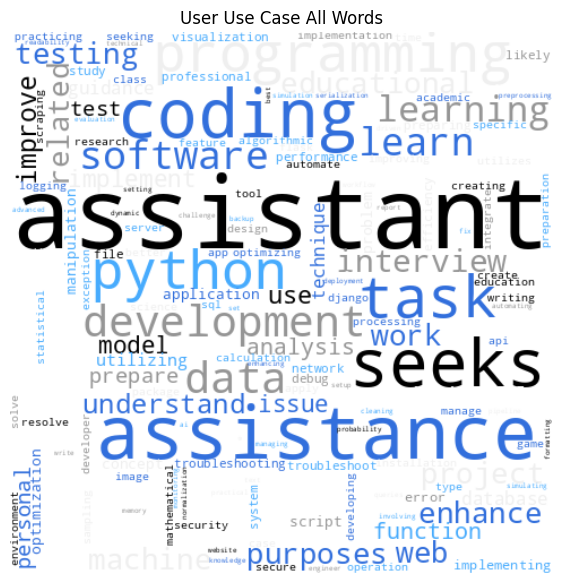

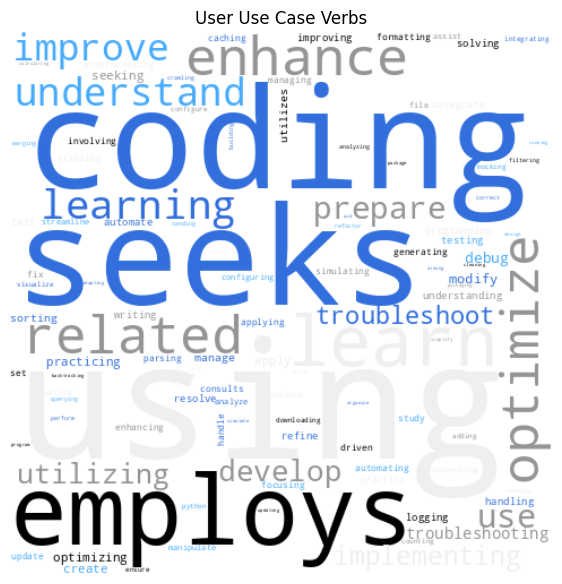

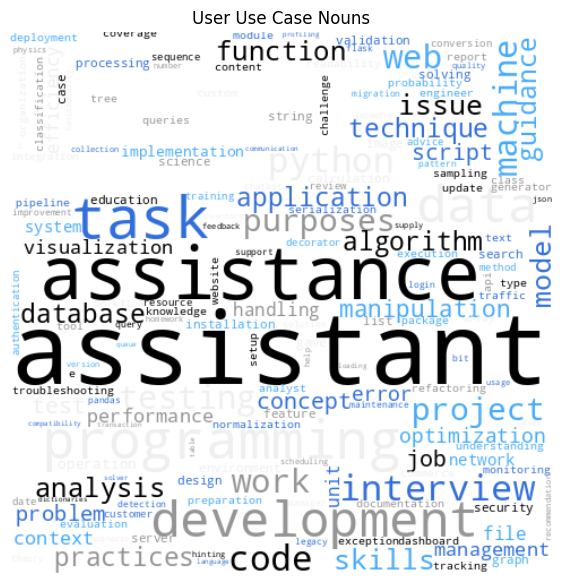

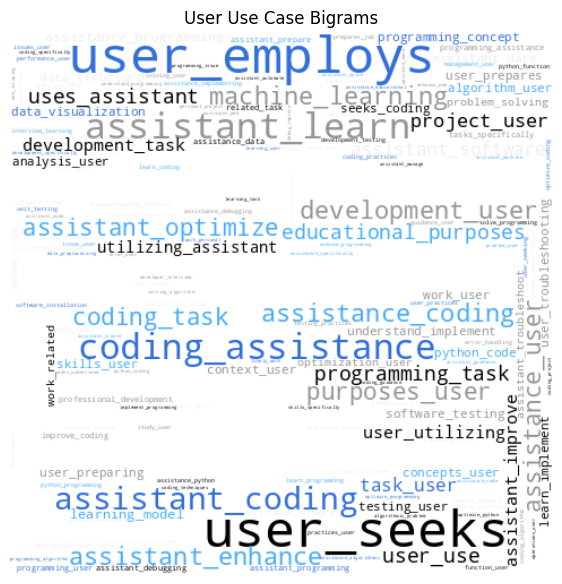

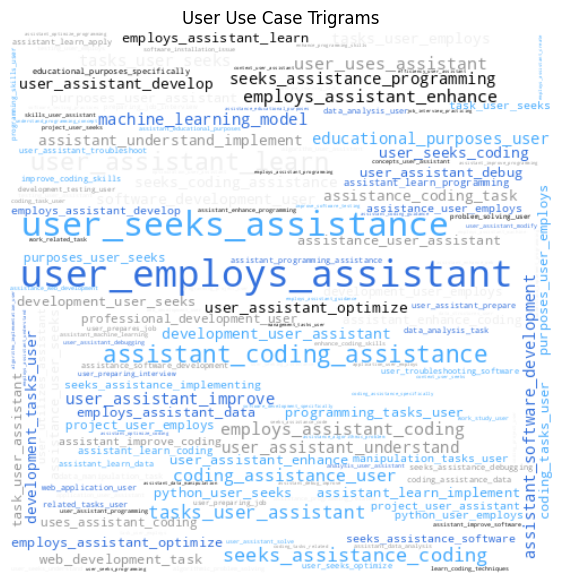

In [28]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Define the color function using the provided color palette
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_palette = [
        "#326FDC",  # Celtic Blue
        "#47ABFD",  # Argentinian Blue
        "#959595",  # Battleship gray
        "#FFFFFF",  # White
        "#EFEFEF",  # Anti-flash white
        "#000000",  # Black
    ]
    return color_palette[np.random.choice(len(color_palette))]

def save_and_show_wordcloud(wordcloud, title, figure_size=(7, 9), file_path=None):
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud.recolor(color_func=color_func, random_state=3), interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.margins(x=0, y=0)
    if file_path:
        plt.savefig(file_path)
    plt.show()

def generate_wordcloud(text, include_pos=None, figure_size=(7, 9), title=None):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    if include_pos:
        words = [token.text for token in doc if token.pos_ in include_pos]
    wordcloud = WordCloud(
        width=480, height=480, margin=0,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS
    ).generate(" ".join(words))
    file_path = None
    if title:
        file_path = f"{DATA_DIR}wordclouds/{title.replace(' ', '_').lower()}.png"
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
    save_and_show_wordcloud(wordcloud, title, figure_size, file_path)


# Generate and display the word clouds
generate_wordcloud(all_text, title='User Use Case All Words')  # All words
generate_wordcloud(all_text, include_pos=['VERB'], title='User Use Case Verbs')  # Verbs only
generate_wordcloud(all_text, include_pos=['NOUN'], title='User Use Case Nouns')  # Nouns only

# Generate word clouds for pairs (bigrams) and triplets (trigrams)
def generate_ngrams_wordcloud(text, n=None, figure_size=(7, 9), title=None):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    if n:
        ngrams = zip(*[words[i:] for i in range(n)])
        words = ["_".join(ngram) for ngram in ngrams]
    # Since we are generating word clouds for bigrams or triplets, we join the words accordingly
    wordcloud = WordCloud(
        width=480, height=480, margin=0,
        background_color="white", colormap="Greys",
        collocations=False,  # Set collocations to True for bigrams/triplets
        stopwords=STOPWORDS
    ).generate(" ".join(words))
    file_path = None
    if title:
        file_path = f"{DATA_DIR}wordclouds/{title.replace(' ', '_').lower()}.png"
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
    save_and_show_wordcloud(wordcloud, title, figure_size, file_path)

generate_ngrams_wordcloud(all_text, n=2, title='User Use Case Bigrams')  # Bigrams
generate_ngrams_wordcloud(all_text, n=3, title='User Use Case Trigrams')  # Trigrams



In [27]:
from utils import DATA_DIR

In [20]:
b4_with_use_cases = delivered_b4.merge(pd.DataFrame(results), left_on="task_link", right_on="colab_link").drop(columns=['id', 'colab_link'])
b4_with_use_cases.rename(columns={'summary': 'use_case_summary'}, inplace=True)

b4_with_use_cases.to_csv(DATA_DIR + 'use_cases.csv')
b4_with_use_cases

NameError: name 'delivered_b4' is not defined

In [23]:
delivered_df['use_case__summary']

0       The user is using the Assistant for coding ass...
1       The user is using the Assistant for coding ass...
2       User utilizes Assistant for coding assistance,...
3       User seeks assistance with coding, specificall...
4       User employs the Assistant to understand and i...
                              ...                        
3014    User employs Assistant for data visualization ...
3015    User employs Assistant to develop unit tests f...
3016    User seeks assistance in code refactoring for ...
3017    The user is using the Assistant to prepare for...
3018    User prepares for a job interview by practicin...
Name: use_case__summary, Length: 3019, dtype: object

In [24]:
import spacy

nlp = spacy.load("en_core_web_sm")

summaries = delivered_df['use_case__summary'].to_list()
all_text = " ".join(summaries).lower()
doc = nlp(all_text)
filtered_verbs = [token.text for token in doc if token.pos_ == "VERB"]



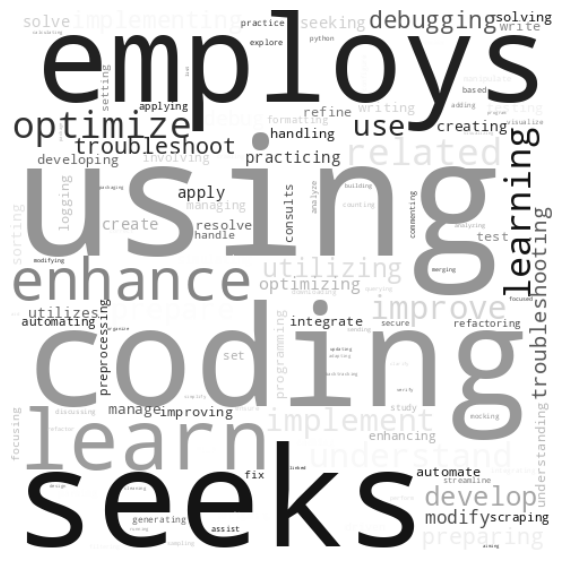

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate a word cloud using the filtered words from the user use case summary
wordcloud = WordCloud(
    width=480, height=480, margin=0,
    background_color="white", colormap="Greys",
    collocations=False,
    stopwords=STOPWORDS
).generate(" ".join(filtered_verbs))

# Display the generated image:
plt.figure(figsize=(7, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [23]:
from pydantic import BaseModel, Field
from typing import List
import os
from llama_index.program import OpenAIPydanticProgram
from llama_index.llms.openai import OpenAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
from pydantic import BaseModel
from llama_index.llms.openai import OpenAI


api_key = os.environ["OPENAI_API_KEY"]

class SummaryResult(BaseModel):
    """Data model for summary."""

    summary: str = Field(description="A short summary containing up to 4 sentences focused on the specific theme.")

class SummaryTheme(BaseModel):
    """Data model for the summarization aspect and perspective."""

    theme : str = Field(description="Aspect and theme for which to provide summary.")


def exec_summary(conversation: List[List[dict]], summary_theme: SummaryTheme):

    prompt_template_str = """
    Given the following conversation, please, generate an executive summary for a given theme and through its lense, not of the conversation.
    You are one of many specialized analyzers, so precisely focus on your target summary theme and topic.

    Summary Theme:
    {summary_theme}

    Conversation:
    {conversation}
    """
    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=SummaryResult, 
        prompt_template_str=prompt_template_str, verbose=True
    )
    output = program( 
        summary_theme=summary_theme.model_dump(),
        conversation=conversation["messages"]
    )
    return output

In [6]:
AOF_SHEET_ID = "1bsM3nz13BPPqCxmbLYFz5Ed9KOfV51hNoagBP8dP948"
AOF_SHEET_NAME = "Areas status"

In [10]:
aof_df = download_sheet_as_df(service_account_path, AOF_SHEET_ID, AOF_SHEET_NAME)

In [17]:
def format_topics_with_additional(df):
    topics = []
    last_highlevel = None
    for _, row in df.iterrows():
        highlevel = row['Highlevel_topic']
        sublevel = row['Sublevel_topic']
        if highlevel != last_highlevel:
            topics.append(f"{last_highlevel} -> [[fill out another topic you think best fits the conversation and is not included]]")
        
        topics.append(f"{highlevel} -> {sublevel.strip(' - ')}")
        # Add another entry with the same highlevel topic but a placeholder for a new sublevel topic
        # only if the highlevel topic has changed from the last one processed
        last_highlevel = highlevel
    topics.append(f"{last_highlevel} -> [[fill out another topic you think best fits the conversation and is not included]]")
    return '\n'.join(topics)

formatted_topics = format_topics_with_additional(aof_df)
formatted_topics += '\nOther -> [[fill out another topic you think best fits the conversation and is not included]]'
print(formatted_topics)


None -> [[fill out another topic you think best fits the conversation and is not included]]
Basic scripting -> Write simple code in Python
Basic scripting -> Write simple code in Javascript
Basic scripting -> Other languages
Basic scripting -> ML code snippets
Basic scripting -> [[fill out another topic you think best fits the conversation and is not included]]
General coding help -> Rewrite code using better formatting / best practises
General coding help -> Refactor code
General coding help -> Explain complex code snippets
General coding help -> Add comments to code
General coding help -> Do a code review
General coding help -> [[fill out another topic you think best fits the conversation and is not included]]
Write unit test -> Cover different languages
Write unit test -> Explain code with comments
Write unit test -> Import dependencies
Write unit test -> [[fill out another topic you think best fits the conversation and is not included]]
Interview preparation -> Algorithm problems
I

In [18]:
DOMAIN_CATEGORIES = formatted_topics

In [39]:
import json

class DomainCategory(BaseModel):
    """Datamodel for the category and subcategory calssification.
    If the category is not among provided categories or subcategories, set `new_filled_category` to True otherwise to False."""
    top_level: str
    sub_level: str
    detailed_level: str
    new_filled_category: bool


def classify_conversation_by_domain(conversation: List[dict]) -> DomainCategory:
    prompt_template_str = """
    Categorize the following conversation by domain into one of the following top-level categories, then sub & detailed categories that you think is descriptive & appropriate. If you think that conversation does not best fit into provided classes, you can fill out your own following the provided template [[]].
    
    Categories:

    {categories}

    Conversation:
    {conversation}

    """

    program = OpenAIPydanticProgram.from_defaults(
        llm=OpenAI(api_key=api_key, model="gpt-4-1106-preview", temperature=0),
        output_cls=DomainCategory, 
        prompt_template_str=prompt_template_str, 
        verbose=True
    )
    output = program(
        categories=DOMAIN_CATEGORIES, 
        conversation=conversation["messages"],
    )
    return output


import concurrent.futures
results = []
def process_file(file):
    with open(f"{DATA_DIR}jsonl_conversations/Batch 4/{file}") as f:
        conversation = json.load(f)
    output = classify_conversation_by_domain(conversation)
    record = {
        "id": conversation["id"],
        "colab_link": f"https://colab.research.google.com/drive/{conversation['id']}"
    }
    record.update(output.dict())
    return record

with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(process_file, file) for file in file_list]
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())

Function call: DomainCategory with args: {"top_level":"General coding help","sub_level":"Refactor code","detailed_level":"Use context managers for resource management","new_filled_category":false}


/tmp/ipykernel_40498/180124507.py:48: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  record.update(output.dict())


Function call: DomainCategory with args: {"top_level":"General coding help","sub_level":"Explain complex code snippets","detailed_level":"Logging system configuration and maintenance","new_filled_category":false}
Function call: DomainCategory with args: {"top_level":"Basic scripting","sub_level":"Write simple code in Python","detailed_level":"Dictionary comprehension","new_filled_category":false}
Function call: DomainCategory with args: {"top_level":"General coding help","sub_level":"Explain complex code snippets","detailed_level":"Graph traversal algorithms","new_filled_category":false}
Function call: DomainCategory with args: {"top_level":"Debugging and Troubleshooting","sub_level":"Debug error trace","detailed_level":"Troubleshoot and fix issues with pretrained models","new_filled_category":false}
Function call: DomainCategory with args: {"top_level":"Write unit test","sub_level":"Explain code with comments","detailed_level":"Best practices for naming and structuring test functions 

In [29]:
results[0]

{'id': '1-GgbEGJNm15JLg3K63cduSJjvCtFRN6k',
 'top_level': 'Debugging and Troubleshooting',
 'sub_level': 'Debug error trace',
 'detailed_level': 'Troubleshoot API KeyError after software update'}

In [26]:
import os

file_list = os.listdir(DATA_DIR + "jsonl_conversations/Batch 4/")[:50]

In [47]:
import pandas as pd

use_cases_df = pd.read_csv(DATA_DIR + "use_cases.csv")
b4_with_use_cases_and_domains = use_cases_df.merge(pd.DataFrame(results), left_on="task_link", right_on="colab_link").drop(columns=['id', 'colab_link'])
b4_with_use_cases_and_domains.rename(columns={'summary': 'use_case_summary'}, inplace=True)

b4_with_use_cases_and_domains.to_csv(DATA_DIR + "use_cases_and_domains.csv")
b4_with_use_cases_and_domains


,Unnamed: 0,task_link,jsonl_link,metadata__topic,number_of_turns,duration_mins,batch_id,use_case_summary,top_level,sub_level,detailed_level,new_filled_category
0,0,https://colab.research.google.com/drive/1YJ4ZU...,https://drive.google.com/file/d/10Kxf0a216Ubzy...,algorithms > by_topic > recursion,3,35,4,The user engages with the Assistant to explore...,Interview preparation,Algorithm problems,Explaining and implementing recursive algorithms,False
1,1,https://colab.research.google.com/drive/194T2w...,https://drive.google.com/file/d/1trpxc0dJM0G9c...,algorithms > by_topic > union_find,3,45,4,The user engages with the Assistant to learn a...,Basic scripting,Write simple code in Python,Union-find data structure implementation,False
2,2,https://colab.research.google.com/drive/1TgKet...,https://drive.google.com/file/d/1cqkk5R6JhjwWR...,web_development > python_frameworks,2,30,4,The user in the conversation is seeking assist...,Basic scripting,Write simple code in Python,Creating middleware in FastAPI,False
3,3,https://colab.research.google.com/drive/1KgQjX...,https://drive.google.com/file/d/1jZjILh5ysG4z6...,web_development > python_frameworks,2,30,4,The user is seeking assistance with handling f...,General coding help,Explain complex code snippets,Handling form data in Pyramid web framework,False
4,4,https://colab.research.google.com/drive/1VsYuz...,https://drive.google.com/file/d/1b-mwhB1jnVi-g...,unit_testing_methodology > data_quality_tests,3,45,4,The user in the conversation is seeking assist...,Write unit test,Cover different languages,Mocking database calls in Python unit tests,False
5,5,https://colab.research.google.com/drive/11iCSp...,https://drive.google.com/file/d/1d1oTKOvtGapxW...,python_language_and_scripting > python_c_exten...,2,40,4,The user is engaging with the Assistant to dev...,General coding help,Refactor code,Create a new module method in Python C extension,False
6,6,https://colab.research.google.com/drive/1VRmLc...,https://drive.google.com/file/d/1_TzJoICr6vWKp...,database > database_normalization,2,45,4,"In the conversation, the user utilizes the Ass...",Basic scripting,Write simple code in Python,Database operations with Python lists,False
7,7,https://colab.research.google.com/drive/1HXhbb...,https://drive.google.com/file/d/1kfYDt3WAiAWpk...,python_language_and_scripting > pythonic_code,3,10,4,The user utilizes the Assistant to improve the...,General coding help,Explain complex code snippets,Using join method in Python for string concate...,False
8,8,https://colab.research.google.com/drive/1aiZ-t...,https://drive.google.com/file/d/132W3XJqt9TgQW...,database > database_backup_and_recovery,2,40,4,The user utilizes the Assistant to learn how t...,Basic scripting,Write simple code in Python,Backup SQLite database using Python,False
9,9,https://colab.research.google.com/drive/1nLBy0...,https://drive.google.com/file/d/1oQWRsHEBQca76...,unit_testing_methodology > best_practices_in_w...,2,35,4,The user is seeking guidance on best practices...,Write unit test,Explain code with comments,Best practices for naming and structuring test...,False


In [27]:
aof_df[['Highlevel_topic', 'Sublevel_topic']].to_csv()

',Highlevel_topic,Sublevel_topic\n0,Basic scripting,Write simple code in Python\n1,Basic scripting,Write simple code in Javascript\n2,Basic scripting,Other languages\n3,Basic scripting,ML code snippets\n4,General coding help,Rewrite code using better formatting / best practises\n5,General coding help,Refactor code\n6,General coding help,Explain complex code snippets\n7,General coding help,Add comments to code\n8,General coding help,Do a code review\n9,Write unit test,Cover different languages\n10,Write unit test,Explain code with comments\n11,Write unit test,Import dependencies\n12,Interview preparation,Algorithm problems\n13,Interview preparation,Explain the problem step by step\n14,Interview preparation,Write optimal code\n15,Interview preparation,Explain areas where people usually make mistakes\n16,Interview preparation,Explain alternative solutions and trade offs\n17,Interview preparation,Debug and fix code\n18,Interview preparation,System Design rounds\n19,Interview preparation,Pr

In [25]:
!pip install tabulate

In [30]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 4.5 MB/s eta 0:00:0000:0100:01


In [31]:
import pandas as pd
import plotly.graph_objects as go

# Create 4 copies of subsamples with different batch_id values
b4_with_use_cases_and_domains = pd.read_csv(DATA_DIR + "use_cases_and_domains.csv")
subsample_sizes = [300, 600, 500, 100]
subsamples = [b4_with_use_cases_and_domains.sample(n=size, random_state=i).assign(batch_id=i+1) for i, size in enumerate(subsample_sizes)]

# Construct a Sankey diagram from the subsamples
fig = go.Figure()

for subsample in subsamples:
    source = subsample['top_level']
    target = subsample['sub_level']
    value = subsample.groupby(['top_level', 'sub_level']).size().reset_index(name='counts')['counts']

    fig.add_trace(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=pd.concat([source, target]).unique(),
        ),
        link=dict(
            source=pd.concat([source, target]).astype('category').cat.codes[:len(source)], # indices correspond to labels, eg A1, A2, A1, B1, ...
            target=pd.concat([source, target]).astype('category').cat.codes[len(source):],
            value=value
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Top and Sub Level Domains", font_size=10)
fig.show()


ValueError: Cannot take a larger sample than population when 'replace=False'

In [4]:
import pandas as pd


b4_with_use_cases_and_domains = pd.read_csv(DATA_DIR + "use_cases_and_domains.csv")

unique_top_sub_levels = b4_with_use_cases_and_domains[['top_level', 'sub_level']].drop_duplicates()
unique_top_sub_levels


,top_level,sub_level
0,Interview preparation,Algorithm problems
1,Basic scripting,Write simple code in Python
3,General coding help,Explain complex code snippets
4,Write unit test,Cover different languages
5,General coding help,Refactor code
9,Write unit test,Explain code with comments
11,Basic scripting,ML code snippets
13,Basic scripting,Other languages
15,Debugging and Troubleshooting,Debug error trace
30,Interview preparation,Explain the problem step by step


In [13]:
unique_top_sub_levels.apply(tuple, 1)

0           (Interview preparation, Algorithm problems)
1        (Basic scripting, Write simple code in Python)
3     (General coding help, Explain complex code sni...
4          (Write unit test, Cover different languages)
5                  (General coding help, Refactor code)
9         (Write unit test, Explain code with comments)
11                  (Basic scripting, ML code snippets)
13                   (Basic scripting, Other languages)
15    (Debugging and Troubleshooting, Debug error tr...
30    (Interview preparation, Explain the problem st...
dtype: object

In [16]:
aof_df[['Highlevel_topic', 'Sublevel_topic']].apply(tuple, 1)

0        (Basic scripting, Write simple code in Python)
1     (Basic scripting, Write simple code in Javascr...
2                    (Basic scripting, Other languages)
3                   (Basic scripting, ML code snippets)
4     (General coding help, Rewrite code using bette...
5                  (General coding help, Refactor code)
6     (General coding help, Explain complex code sni...
7           (General coding help, Add comments to code)
8               (General coding help, Do a code review)
9          (Write unit test, Cover different languages)
10        (Write unit test, Explain code with comments)
11               (Write unit test, Import dependencies)
12          (Interview preparation, Algorithm problems)
13    (Interview preparation, Explain the problem st...
14          (Interview preparation, Write optimal code)
15    (Interview preparation, Explain areas where pe...
16    (Interview preparation, Explain alternative so...
17          (Interview preparation, Debug and fi

In [19]:

missing_touples = unique_top_sub_levels[~unique_top_sub_levels.apply(tuple, 1).isin(aof_df[['Highlevel_topic', 'Sublevel_topic']].apply(tuple, 1))]
missing_touples

,top_level,sub_level


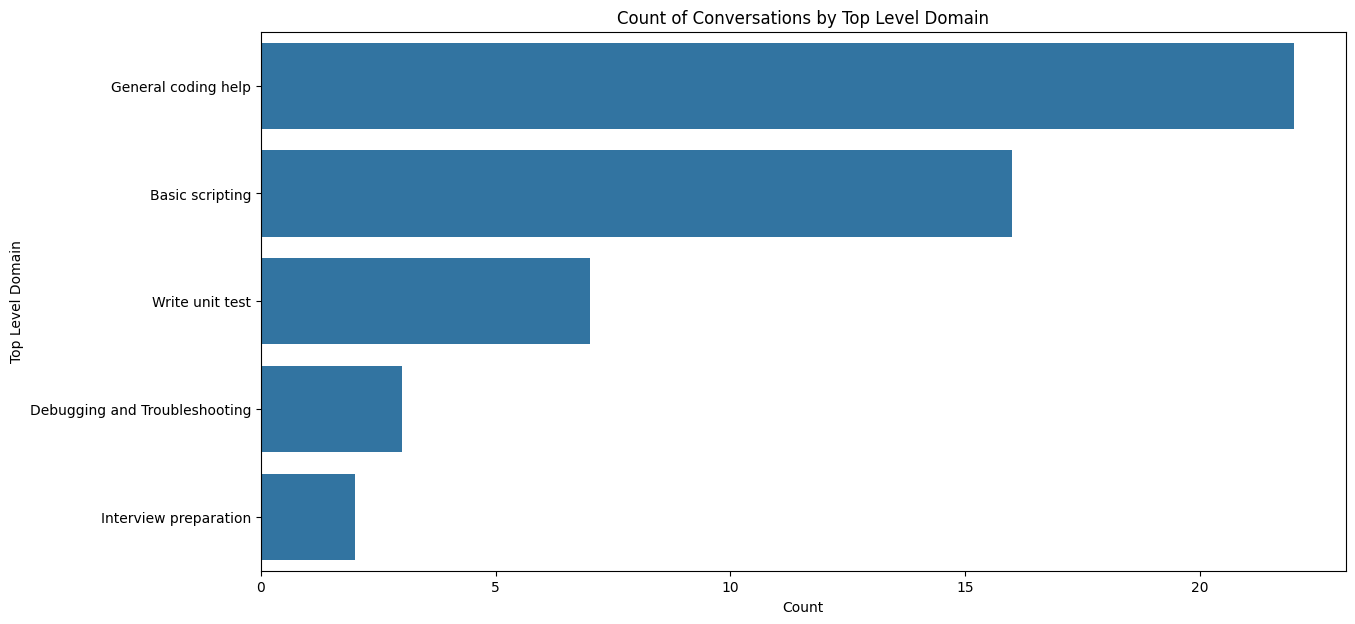

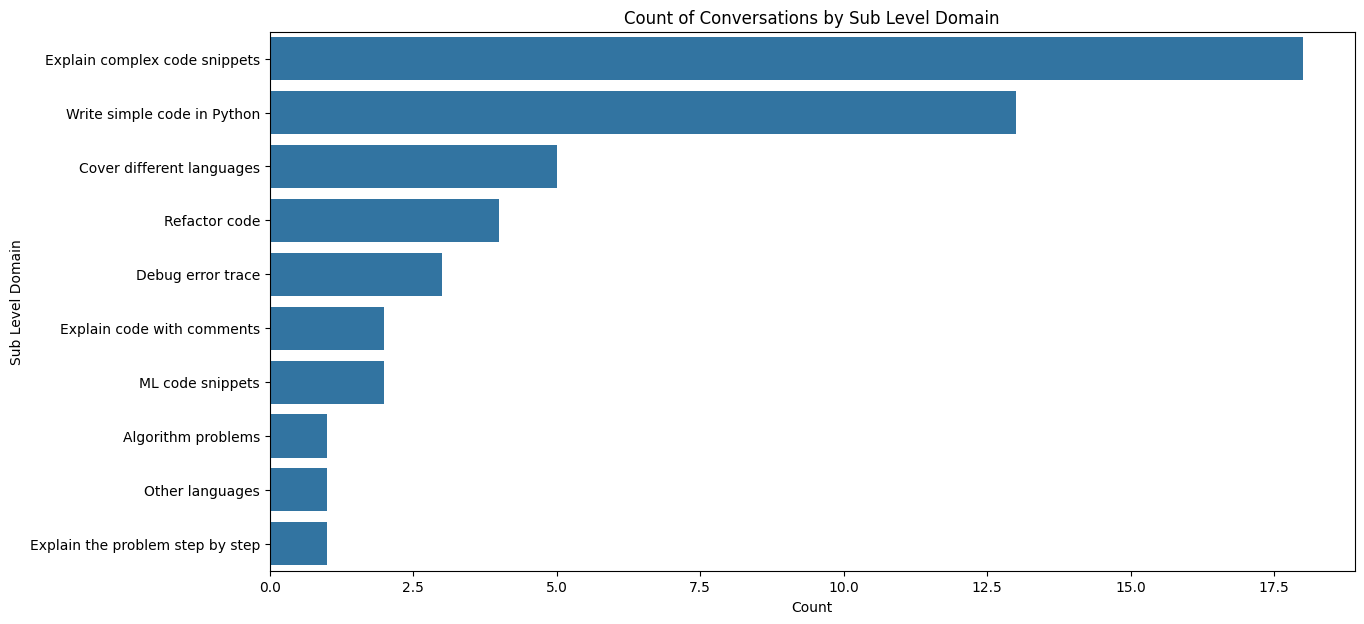

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.countplot(data=b4_with_use_cases_and_domains, y='top_level', order=b4_with_use_cases_and_domains['top_level'].value_counts().index)
plt.title('Count of Conversations by Top Level Domain')
plt.xlabel('Count')
plt.ylabel('Top Level Domain')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=b4_with_use_cases_and_domains, y='sub_level', order=b4_with_use_cases_and_domains['sub_level'].value_counts().index)
plt.title('Count of Conversations by Sub Level Domain')
plt.xlabel('Count')
plt.ylabel('Sub Level Domain')
plt.show()






In [45]:


new_filled_category_count = b4_with_use_cases_and_domains['new_filled_category'].value_counts()
print("Number of new categories:", len(new_filled_category_count))
new_filled_category_count





Number of new categories: 1


new_filled_category
False    50
Name: count, dtype: int64

In [46]:
b4_with_use_cases_and_domains[b4_with_use_cases_and_domains['new_filled_category']]

,Unnamed: 0,task_link,jsonl_link,metadata__topic,number_of_turns,duration_mins,batch_id,use_case_summary,top_level,sub_level,detailed_level,new_filled_category


In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

turing_palette = [
    "#326FDC",  # Celtic Blue
    "#47ABFD",  # Argentinian Blue
    "#959595",  # Battleship gray
    "#FFFFFF",  # White
    "#EFEFEF",  # Anti-flash white
    "#000000",  # Black
]

def compute_frequencies(batches):
    frequency_list = []
    for batch in batches:
        counter = Counter()
        for item in batch:
            for behaviour in item['behaviours']:
                top_sub_pair = (behaviour['top_level'], behaviour['sub_level'])
                counter[top_sub_pair] += 1
        frequency_list.append(counter)
    return frequency_list


frequencies = compute_frequencies(batches)
frequencies


def plot_top_behaviours(frequencies, title, top_n=5):
    # Combine all counters and get the most common behaviours
    combined_counter = Counter()
    for freq in frequencies:
        combined_counter.update(freq)
    top_behaviours = combined_counter.most_common(top_n)

    # Prepare data for seaborn barplot
    behaviours, counts = zip(*top_behaviours)
    sns.set_palette(sns.color_palette(turing_palette))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=[f'{behaviour[0]} - {behaviour[1]}' for behaviour in behaviours])
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Behaviour')
    plt.show()

for i, batch in enumerate(frequencies, start=1):
    plot_top_behaviours([batch], f'Top 5 Behaviours for Batch {i}')

plot_top_behaviours(frequencies, 'Top 5 Behaviours Across All Batches')

